In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
tokenizer = Tokenizer()
data = "Vai se entregar pra mim\nComo a primeira vez\nVai delirar de amor\nSentir o meu calor\nVai me pertencer\nSou pássaro de fogo\nQue canta ao teu ouvido\nVou ganhar esse jogo\nTe amando feito um louco\nQuero teu amor bandido\nMinha alma viajante\nCoração independente\nPor você corre perigo\nTô afim dos teus segredos\nDe tirar o teu sossego\nSer bem mais que um amigo\nNão diga que não\nNão negue a você\nUm novo amor\nUma nova paixão\nDiz pra mim\nTão longe do chão\nSerei os teus pés\nNas asas do sonho rumo ao teu coração\nPermita sentir\nSe entrega pra mim\nCavalgue em meu corpo, minha eterna paixão\nVai se entregar pra mim\nComo a primeira vez\nVai delirar de amor\nSentir o meu calor\nVai me pertencer\nSou pássaro de fogo\nQue canta ao teu ouvido\nVou ganhar esse jogo\nTe amando feito um louco\nQuero teu amor bandido\nMinha alma viajante\nCoração independente\nPor você corre perigo\nTô afim dos teus segredos\nDe tirar o teu sossego\nSer bem mais que um amigo\nNão diga que não\nNão negue a você\nUm novo amor\nUma nova paixão\nDiz pra mim\nTão longe do chão\nSerei os teus pés\nNas asas do sonho rumo ao teu coração\nPermita sentir\nSe entrega pra mim\nCavalgue em meu corpo, minha eterna paixão\nTão longe do chão\nSerei os teus pés\nNas asas do sonho rumo ao teu coração\nPermita sentir\nSe entrega pra mim\nCavalgue em meu corpo, minha eterna paixão\nEu tô carente desse teu abraço\nDesse teu amor que me deixa leve\nEu tô carente desses olhos negros\nDesse teu sorriso branco feito neve\nEu tô carente desse olhar que mata\nDessa boca quente revirando tudo\nTô com saudade dessa cara linda\nMe pedindo: Fica só mais um segundo\nTô feito mato, desejando a chuva\nMadrugada fria, esperando o Sol\nTô tão carente feito um prisioneiro\nVivo um pesadelo, beijo sem paixão\nTô com vontade de enfrentar o mundo\nSer pra sempre o guia do seu coração\nSou a metade de um amor que vibra\nNuma poesia em forma de canção\nSem você, sou caçador sem caça\nSem você, a solidão me abraça\nSem você, sou menos que a metade\nSou incapacidade de viver por mim\nSem você, eu sem você\nEu tô carente desse teu abraço\nDesse teu amor que me deixa leve\nEu tô carente desses olhos negros\nDesse teu sorriso branco feito neve\nEu tô carente desse olhar que mata\nDessa boca quente revirando tudo\nTô com saudade dessa cara linda\nMe pedindo: Fica só mais um segundo\nTô feito mato desejando a chuva\nMadrugada fria esperando o Sol\nTô tão carente feito um prisioneiro\nVivo um pesadelo, beijo sem paixão\nTô com vontade de enfrentar o mundo\nSer pra sempre o guia do seu coração\nSou a metade de um amor que vibra\nNuma poesia em forma de canção\nSem você, sou caçador sem caça\nSem você, a solidão me abraça\nSem você, sou menos que a metade\nSou incapacidade de viver por mim\nSem você, sou caçador sem caça\nSem você, a solidão me abraça\nSem você, sou menos que a metade\nSou incapacidade de viver por mim\nSem você\nSem você, oh\nSem você, eu sem você\nSem você\nQuantas você já amou?\nPoucos amei e bem sei\nQuando me lembro de alguém\nSó dá você\nQuantas você já beijou?\nEu só beijei quem amei\nMas se juntar quem amei\nNão dá você\nO que é que você tem, hein\nQue os outros não tem?\nDe onde você vem, hein?\nVem!\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nQuantas você já amou?\nPoucos amei e bem sei\nQuando me lembro de alguém\nSó dá você\nO que é que você tem, hein\nQue os outros não tem?\nDe onde você vem, hein?\nVem!\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu\nSabe um beijo bom? O seu!\nUm abraço bom? O seu!\nE olha o que aconteceu\nDeu certinho com o meu"
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'o': 1, 'você': 2, 'que': 3, 'um': 4, 'sem': 5, 'de': 6, 'tô': 7, 'seu': 8, 'teu': 9, 'a': 10, 'bom': 11, 'sou': 12, 'meu': 13, 'me': 14, 'com': 15, 'mim': 16, 'amor': 17, 'pra': 18, 'não': 19, 'eu': 20, 'abraço': 21, 'beijo': 22, 'e': 23, 'feito': 24, 'do': 25, 'carente': 26, 'desse': 27, 'coração': 28, 'paixão': 29, 'sabe': 30, 'olha': 31, 'aconteceu': 32, 'deu': 33, 'certinho': 34, 'vai': 35, 'se': 36, 'sentir': 37, 'ao': 38, 'minha': 39, 'por': 40, 'teus': 41, 'tão': 42, 'os': 43, 'em': 44, 'só': 45, 'metade': 46, 'ser': 47, 'bem': 48, 'mais': 49, 'dessa': 50, 'amei': 51, 'tem': 52, 'hein': 53, 'vem': 54, 'longe': 55, 'chão': 56, 'serei': 57, 'pés': 58, 'nas': 59, 'asas': 60, 'sonho': 61, 'rumo': 62, 'permita': 63, 'entrega': 64, 'cavalgue': 65, 'corpo': 66, 'eterna': 67, 'caçador': 68, 'caça': 69, 'solidão': 70, 'abraça': 71, 'menos': 72, 'incapacidade': 73, 'viver': 74, 'quantas': 75, 'já': 76, 'dá': 77, 'entregar': 78, 'como': 79, 'primeira': 80, 'vez': 81, 'delirar': 82, 'calo

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index["a"])


10


In [ ]:
print(xs[6])

[ 0  0  0  0 79 10 80]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
20/20 [==============================] - 0s 6ms/step - loss: 5.1228 - accuracy: 0.0557
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 5.0522 - accuracy: 0.0621
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 4.8305 - accuracy: 0.0557
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 4.6305 - accuracy: 0.0525
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 4.5577 - accuracy: 0.0669
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 4.5000 - accuracy: 0.0637
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 4.4363 - accuracy: 0.0685
Epoch 8/500
20/20 [==============================] - 0s 6ms/step - loss: 4.3615 - accuracy: 0.0732
Epoch 9/500
20/20 [==============================] - 0s 6ms/step - loss: 4.2707 - accuracy: 0.0971
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 4.1695 - accuracy: 0.1162
Epoch 11/

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

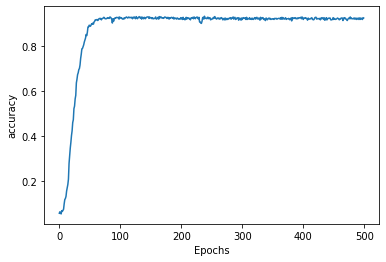

In [ ]:
plot_graphs(history, "accuracy")

In [ ]:
seed_text = "Minehirinha ferveu"
next_words = 20
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len -1, padding="pre")
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Minehirinha ferveu os outros não tem hein hein hein sem que caça caça solidão sem paixão você vem hein hein hein sem
